In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
import numpy as np
from scipy.stats import entropy
import datetime as dt
from collections import Counter
import infomap
import random
import pickle
import time
import math
import csv
import os

%matplotlib inline

## Load the generated models

In [ ]:
home_dir = os.path.expanduser("~")
code_dir = os.path.join(home_dir,"Developer","GitHub","opportunistic-attachment")
figs_dir = os.path.join(code_dir,"figures")

### Three links

In [10]:
optimals = {}
randoms = {}
runs = {"i1o2":5,
        "i2o1":2,
        "i-o3":3}
for model in runs:
    optimals[model] = {}
    for i in range(runs[model]):
        # LOAD RUN
        network = "_".join([model,"m3","a0.99","ginf"])
        with open(os.path.join(code_dir,"networks",network,"run_"+str(i)+'.pkl'), 'rb') as f:
            optimals[model][i] = pickle.load(f)
# RANDOM
for i in range(10):
    # LOAD RUN
    network = "_".join(["i2o1","m3","a0.99","grnd"])
    with open(os.path.join(code_dir,"networks",network,"run_"+str(i)+'.pkl'), 'rb') as f:
        randoms[i] = pickle.load(f)
 

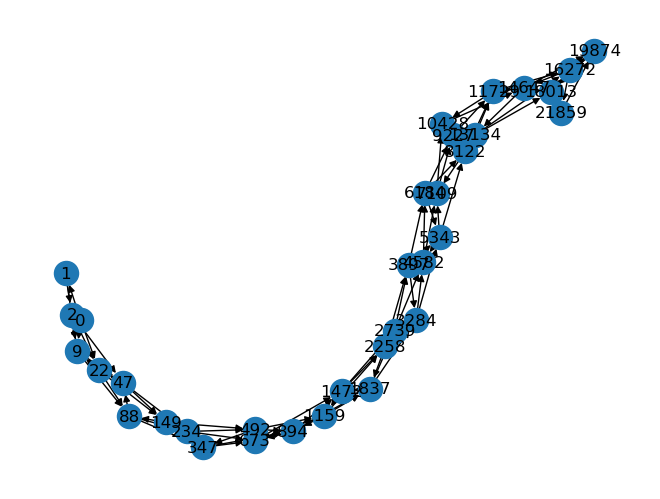

In [13]:
tmp = nx.draw(optimals["i-o3"][0].networks[-1],with_labels=True)
plt.savefig(os.path.join(figs_dir,"appendix","i-o3_network.jpeg"))
plt.show()

In [14]:
nodes = [nx.number_of_nodes(network) for network in randoms[0].networks]
edges = [nx.number_of_edges(network) for network in randoms[0].networks]

diams_inf = {}
for model in runs:
    diams_inf[model] = {}
    for run in optimals[model]:
        diams_inf[model][run] = [nx.diameter(network) for network in optimals[model][run].networks]

diams_rnd = {}
for run in randoms:
    diams_rnd[run] = [nx.diameter(network) for network in randoms[run].networks]

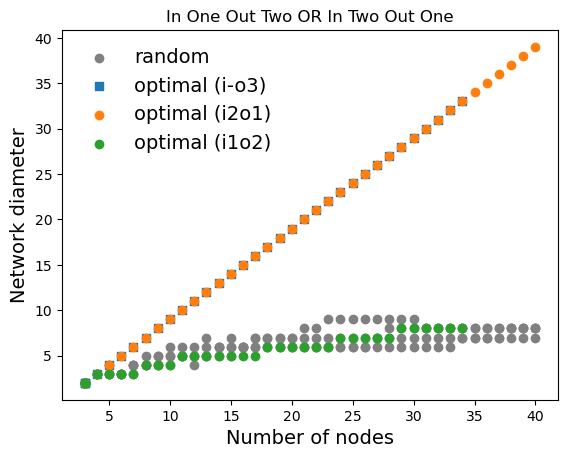

In [16]:
plot = plt.scatter(nodes,diams_rnd[0], color = 'grey', label = "random")
plot = plt.scatter(nodes,diams_rnd[1], color = 'grey')
plot = plt.scatter(nodes,diams_rnd[2], color = 'grey')
plot = plt.scatter(nodes,diams_rnd[3], color = 'grey')
plot = plt.scatter(nodes[:34],diams_inf["i-o3"][0], marker = 's', label = "optimal (i-o3)")
plot = plt.scatter(nodes,diams_inf["i2o1"][1], label = "optimal (i2o1)")
plot = plt.scatter(nodes[:34],diams_inf["i1o2"][3], label = "optimal (i1o2)")
plt.xlabel("Number of nodes", fontsize = 14)
plt.ylabel("Network diameter", fontsize = 14)
plt.legend(loc='upper left',frameon=False, fontsize=14)
plt.title("In One Out Two OR In Two Out One")
# save
plt.savefig(os.path.join(figs_dir,"appendix","i-o3_diameter.jpeg"))
plt.savefig(os.path.join(figs_dir,"appendix","i-o3_diameter.pdf"))
# show
plt.show()

### In Two Out Two

In [17]:
optimals = {}
randoms = {}

for i in range(2):
    # LOAD RUN
    network = "_".join(["i2o2","m4","a0.99","ginf"])
    with open(os.path.join(code_dir,"networks",network,"run_"+str(i)+'.pkl'), 'rb') as f:
        optimals[i] = pickle.load(f)
# RANDOM
for i in range(10):
    # LOAD RUN
    network = "_".join(["i2o2","m4","a0.99","grnd"])
    with open(os.path.join(code_dir,"networks",network,"run_"+str(i)+'.pkl'), 'rb') as f:
        randoms[i] = pickle.load(f)

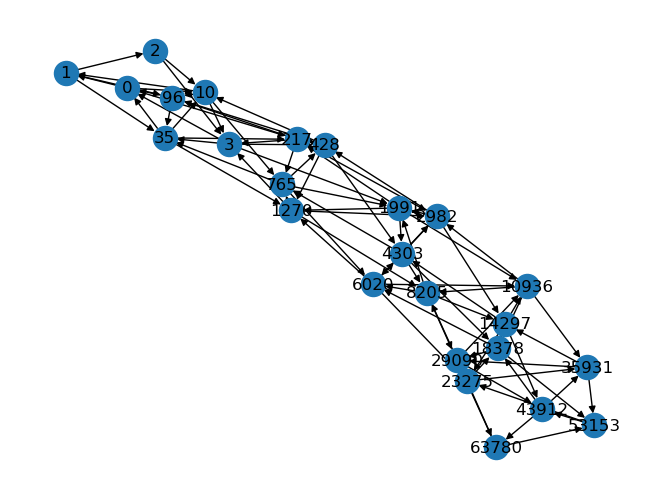

In [26]:
tmp = nx.draw(optimals[0].networks[-1],with_labels=True)
plt.savefig(os.path.join(figs_dir,"appendix","i2o2_network.jpeg"))
plt.show()

In [18]:
nodes = [nx.number_of_nodes(network) for network in randoms[0].networks]
edges = [nx.number_of_edges(network) for network in randoms[0].networks]

diams_inf = {}
for run in optimals:
    diams_inf[run] = [nx.diameter(network) for network in optimals[run].networks]

diams_rnd = {}
for run in randoms:
    diams_rnd[run] = [nx.diameter(network) for network in randoms[run].networks]

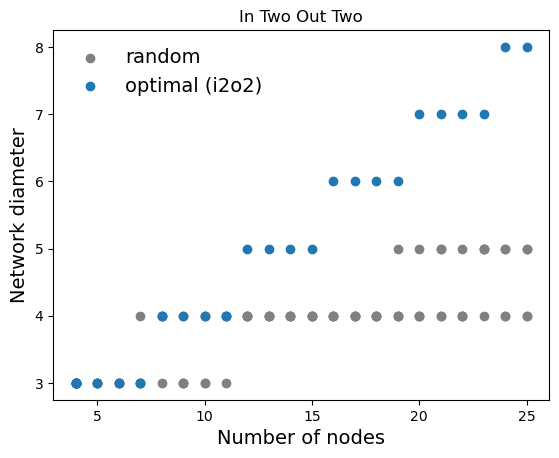

In [23]:
plot = plt.scatter(nodes,diams_rnd[0], color = 'grey', label = "random")
plot = plt.scatter(nodes,diams_rnd[1], color = 'grey')
plot = plt.scatter(nodes,diams_rnd[2], color = 'grey')
plot = plt.scatter(nodes,diams_rnd[3], color = 'grey')
plot = plt.scatter(nodes,diams_inf[0], label = "optimal (i2o2)")
plt.xlabel("Number of nodes", fontsize = 14)
plt.ylabel("Network diameter", fontsize = 14)
plt.legend(loc='upper left',frameon=False, fontsize=14)
plt.title("In Two Out Two")
# save
plt.savefig(os.path.join(figs_dir,"appendix","i2o2_diameter.jpeg"))
plt.savefig(os.path.join(figs_dir,"appendix","i2o2_diameter.pdf"))
# show
plt.show()